In [1]:
import numpy as np
import pandas as pd

In [2]:
peak = np.loadtxt('../data/output_diff_all_region.txt')
angle = peak.reshape(5,-1)
angle = np.where(angle < -182, angle+365, angle)
angle = np.where(angle >  182, angle-365, angle)

model_names = ["cmip5_CanESM2","cmip5_CCSM4","cmip5_CSIRO-Mk3-6-0","cmip5_NorESM1-M","cmip6_MRI-ESM2-0"]
region_names = ['California','SAmerica', 'Africa','NEurope','Australia','SAfrica']
region_names = region_names + ['Baja','PAC NW','New Zealand','Alaska']

da = pd.DataFrame(data=angle, index=model_names, columns=region_names)

dd = da.stack()
dd = dd.reset_index()
dd = dd.rename(columns={"level_0": "model", "level_1": "region", 0 :"peak"})
ddd = dd['peak'].values

img_path = 'https://raw.githubusercontent.com/kristinchang3/peak_season_cmec/main/images/'
img_links = []

for i, model in enumerate(model_names):
    for j, region in enumerate(region_names):
        filename = img_path+'fig_'+str(i)+"_"+str(j)+'.png'
        img_links.append(filename)

dd['img'] = img_links

In [3]:
angle.shape

(5, 10)

In [4]:
models = dd['model'].unique()
regions = dd['region'].unique()

In [5]:
len(models)

5

In [6]:
len(regions)

10

In [7]:
len(ddd)

50

In [8]:
ref = angle.T[:,0:1]
cmip5 = angle.T[:,1:]

In [9]:
import matplotlib.pyplot as plt

In [10]:
from matplotlib import colors
custom_cmap = colors.ListedColormap(['white','white'])

In [11]:
ref_model = models[0]
ref_model

'cmip5_CanESM2'

In [12]:
import matplotlib.transforms

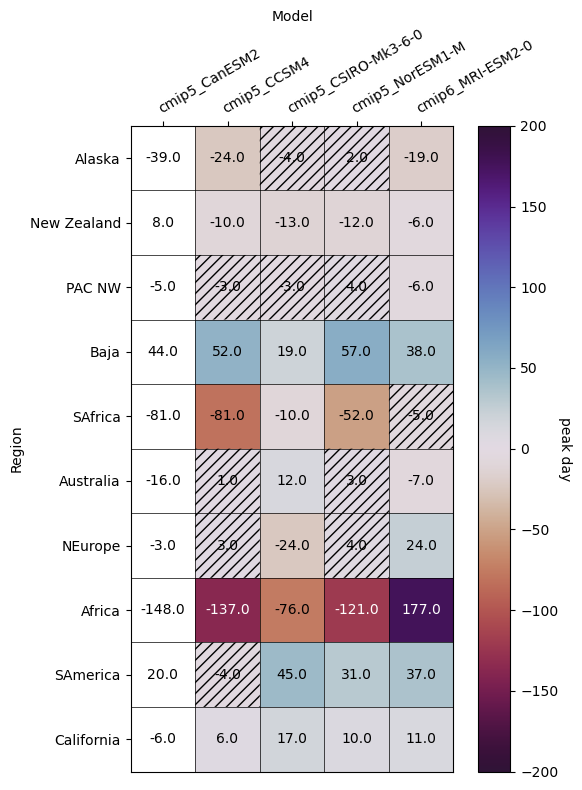

In [19]:
fig, ax = plt.subplots(figsize=(6, 8))

plt.pcolormesh(models[0], regions, angle.T[:,0:1], cmap=custom_cmap, vmin=-200, vmax=200)
plt.pcolormesh(models[1:], regions, angle.T[:,1:], cmap='twilight_shifted_r', vmin=-200, vmax=200) # plot model data

ax.set_xticks(np.arange(len(models)),labels=models, minor=False) # set xaxis labels
ax.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False) # move xaxis labels to the top
plt.setp(ax.get_xticklabels(),rotation=30,ha="left",rotation_mode="anchor") # angle and orient xaxis labels

ax.set_yticks(np.arange(len(regions)), labels=regions) # set yaxis labels
            
# Minor ticks
ax.set_xticks(np.arange(-.5, 5, 1), minor=True)
ax.set_yticks(np.arange(-.5, 10, 1), minor=True)
ax.grid(which='minor',color='black', linewidth=0.5) # create grid lines based off of ticks
# Remove minor ticks
ax.tick_params(which='minor', bottom=False, left=False)

# add hatch pattern where data falls within certain range
patterns = ['', 'oo', '///', 'XXXXX']
pattern = patterns[2]
hatch_above = -5
hatch_below = 5
# define own transform to set overlay at correct data coords
x_shift = 1
y_shift = 0
trans = matplotlib.transforms.Affine2D().translate(x_shift, y_shift)
# create a transparent layer with the pattern
hatch = ax.pcolor((np.arange(angle.T[:,1:].shape[1])),
          (np.arange(angle.T[:,1:].shape[0])),
          np.where((angle.T[:,1:] >= hatch_above) & (angle.T[:,1:]< hatch_below), angle.T[:,1:], np.nan),
          alpha=0,
          hatch=pattern,
          ec='none',
          lw=1
          )
# add the transform
hatch.set_transform(trans + hatch.get_transform())

# Loop over data dimensions and create text annotations.
for i in range(len(regions)):
    for j in range(len(models)):
        if j>0 and angle.T[i,j] >100:
            text = ax.text(j, i, angle.T[i, j],
                        ha="center", va="center", color="w")
        elif j>0 and angle.T[i,j] <-100:
            text = ax.text(j, i, angle.T[i, j],
                        ha="center", va="center", color="w")
        else:
            text = ax.text(j, i, angle.T[i, j],
                        ha="center", va="center", color="black")
        

# create square cells
ax.set_aspect(1)

# add colorbar
plt.colorbar().set_label('peak day', rotation=270, labelpad=10)

# add titles
#ax.set_title('AR Peak Day Difference', pad=30)
ax.set_xlabel('Model')
ax.xaxis.set_label_position('top')
ax.set_ylabel('Region')

fig.tight_layout()
plt.show()

In [ ]:
fig.savefig('../charts/static_portrait_plot.png')